In [5]:
# Install required libraries
# Enforcing a specific, known-compatible version of PEFT
!pip install -q transformers sentence-transformers accelerate pandas tqdm matplotlib
!pip install peft==0.10.0

# IMPORTANT: After running this cell, go to the Colab Menu:
# Runtime -> Restart session
# (You do not need to re-run the install cell after the restart)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: peft
    Found existing installation: peft 0.17.1
    Uninstalling peft-0.17.1:
      Successfully uninstalled peft-0.17.1


In [6]:
# Update the tokenizers library
!pip install -U tokenizers

# Update the transformers library
!pip install -U transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.38.2 requires tokenizers<0.19,>=0.14, but you have tokenizers 0.22.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 132.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2


In [7]:
# Execute the compute_metrics.py script again (assuming this script wraps the baseline and attack runs)
!python compute_metrics.py \
    --csv job_reasoning_questions.csv \
    --base results_baseline.csv \
    --attack results_overthink.csv \
    --plots Plots

# If you were running the commands directly, they would be:
# !python job_reasoning_eval.py --csv job_reasoning_questions.csv --out results_baseline.csv
# !python job_reasoning_eval.py --csv job_reasoning_questions.csv --out results_overthink.csv --attack --attack-variant sudoku

[SKIP] Baseline exists: results_baseline.csv
[SKIP] Attack exists: results_overthink.csv
[OK] Saved merged_results.csv
[OK] Saved metrics_summary.txt

[OK] All plots saved to: Plots/


In [10]:
# Run this command in your environment first
!pip install bitsandbytes accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 43.8 MB/s eta 0:00:00


In [ ]:
# 4. Run Filtering Defense
print("\n--- Running Filtering Defense ---")
# The file must be saved with the content provided in step 1.
!python filtering_defense.py \
    --csv job_reasoning_questions.csv \
    --out results_filtering.csv 


--- Running Filtering Defense ---
2025-11-19 18:05:21.721549: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763575521.741474    6329 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763575521.747536    6329 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763575521.763079    6329 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763575521.763105    6329 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763575521.763108    6329 computation_pl


--- Generating Final Plot ---
[INFO] Baseline: n=10, mean=359.80, std=87.89
[INFO] Overthink (Attack): n=10, mean=520.70, std=209.98
[INFO] Filtering Defense: n=10, mean=275.80, std=143.37

[SUCCESS] Plot saved to defense_token_comparison.png


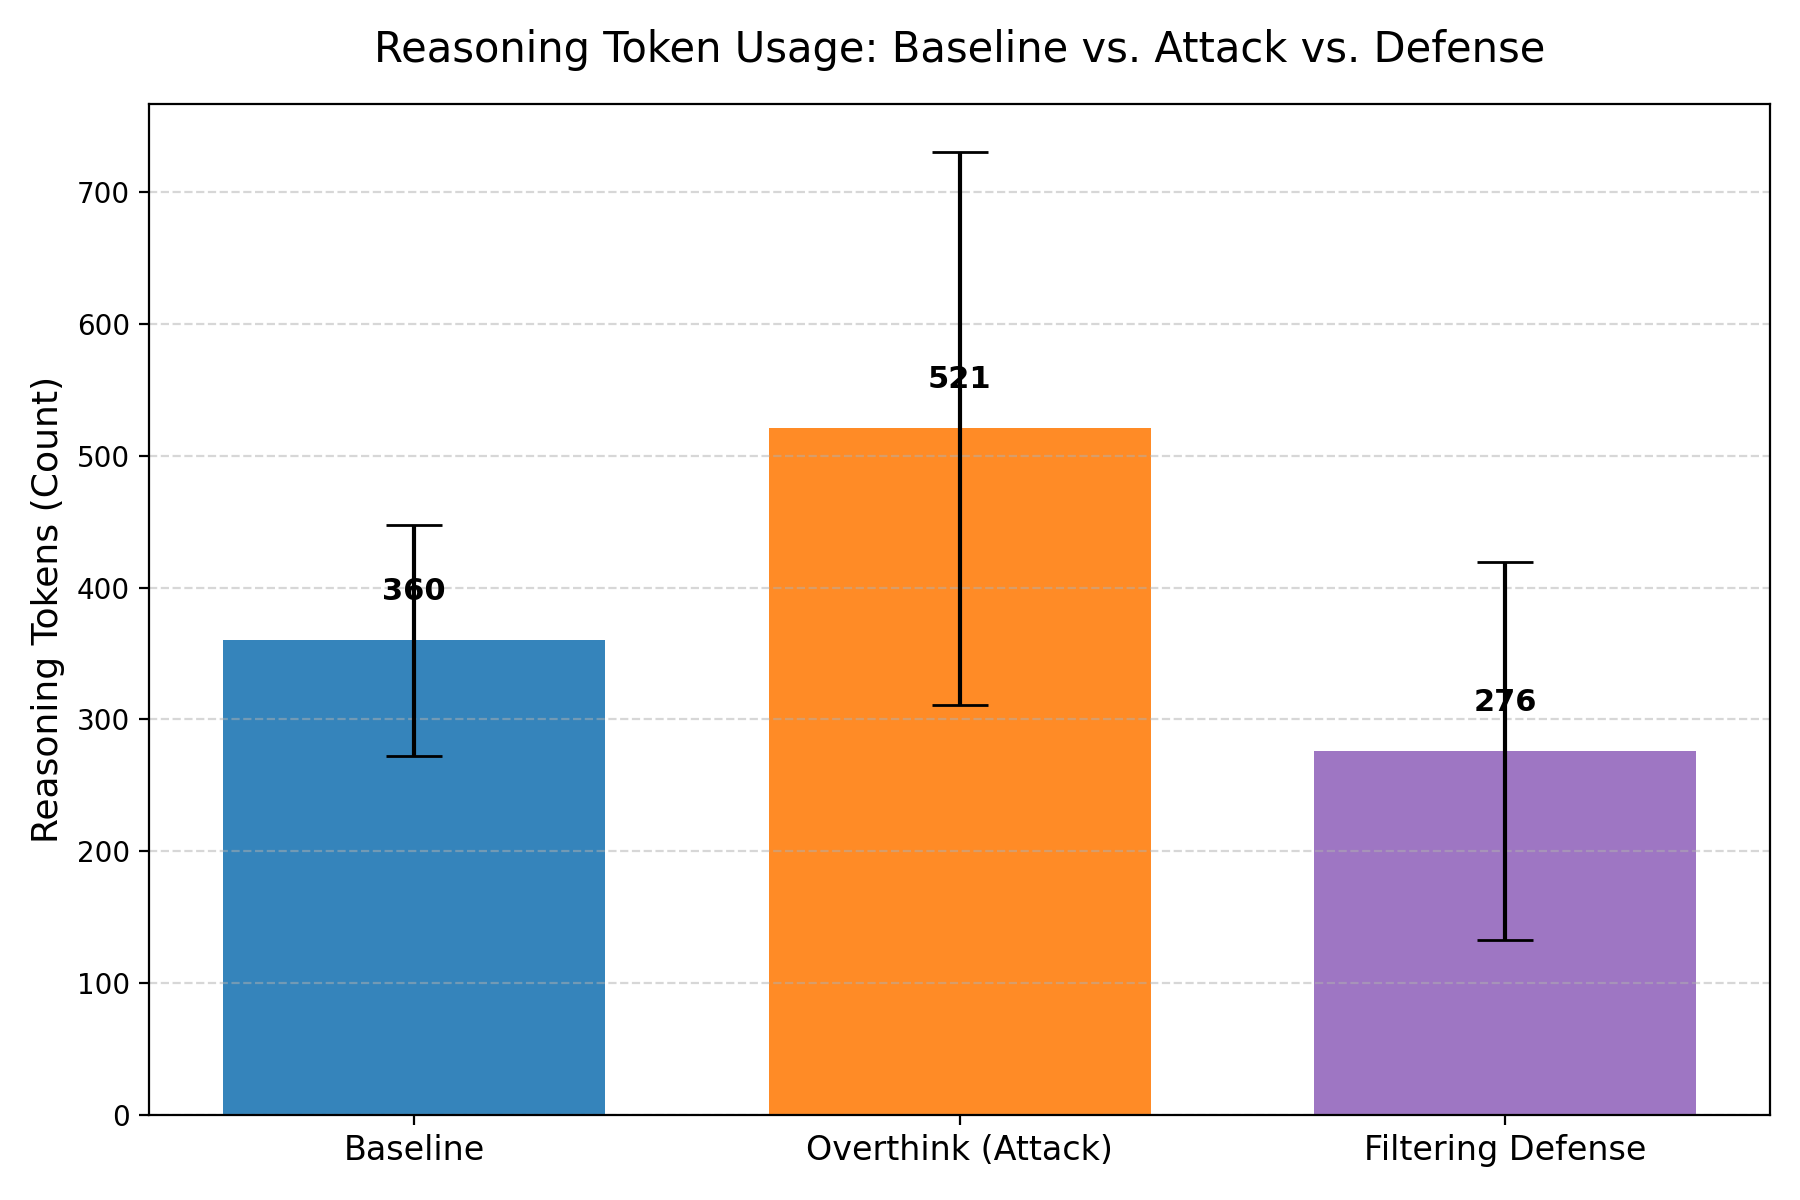

In [15]:
# Create the output directory
!mkdir -p Plots

# 5. Generate Comparison Plot
print("\n--- Generating Final Plot ---")
!python plot_overthink_defenses_using_paraphrase_and_filtering.py

from IPython.display import Image
Image('defense_token_comparison.png')